# Setup

In [3]:
# Add parent directory to current path. Needed for research imports.
import os.path
import sys
p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.insert(0,p)

# Enable hot reloading
%load_ext autoreload
%autoreload 2


import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from experiments.irl.fair_irl import *
from research.irl.fair_irl import *
from research.utils import *


logging.basicConfig(level=logging.INFO)
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

from IPython.display import display, HTML
display(HTML("<style>.container { width:1800px !important; }</style>"))
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Run experiments

In [34]:
base_exp_info = {
    'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
    # Expert demo parameters
    'DATASET': None,
    'TARGET_DATASET': None,
    'N_EXPERT_DEMOS': 3,
    'EXPERT_ALGO': None,
    'N_DATASET_SAMPLES': 25_000,
    # IRL Loop parameters
    'N_TRIALS': 6,
    'IRL_METHOD': None,
    'N_INIT_POLICIES': 1,
    'EPSILON': .03,
    'MAX_ITER': 6,
    'METHOD': 'highs',
    # Plotting parameters
    'NOISE_FACTOR': .02,
    'ANNOTATE': True,
}

In [35]:
experiments = [
    {
        'DATASET': 'COMPAS',
        'TARGET_DATASET': 'Adult',
        'EXPERT_ALGO': 'OptAcc',
        'IRL_METHOD': 'FairIRL',
        'N_TRIALS': 5,
    },
    {
        'DATASET': 'COMPAS',
        'TARGET_DATASET': 'Adult',
        'EXPERT_ALGO': 'HardtDemPar',
        'IRL_METHOD': 'FairIRL',
        'N_TRIALS': 5,
    },
    {
        'DATASET': 'COMPAS',
        'TARGET_DATASET': 'Adult',
        'EXPERT_ALGO': 'HardtEqOpp',
        'IRL_METHOD': 'FairIRL',
        'N_TRIALS': 5,
    },
]

In [36]:
for exp_i, experiment in enumerate(experiments):
    logging.info('\n\n')
    logging.info(f"EXPERIMENT {exp_i+1}/{len(experiments)}")
    
    exp_info = dict(base_exp_info)
    
    for k in experiment:
        exp_info[k] = experiment[k]
        
    run_experiment(exp_info)

INFO:root:


INFO:root:EXPERIMENT 1/3
INFO:root:exp_info: {'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'], 'DATASET': 'COMPAS', 'TARGET_DATASET': 'Adult', 'N_EXPERT_DEMOS': 3, 'EXPERT_ALGO': 'OptAcc', 'N_DATASET_SAMPLES': 25000, 'N_TRIALS': 5, 'IRL_METHOD': 'FairIRL', 'N_INIT_POLICIES': 1, 'EPSILON': 0.03, 'MAX_ITER': 6, 'METHOD': 'highs', 'NOISE_FACTOR': 0.02, 'ANNOTATE': True}
INFO:root:

TRIAL 0

INFO:root:muE:
[[0.63051865 0.72949129 0.75476434]
 [0.6168024  0.84914977 0.87905605]
 [0.62521441 0.8166998  0.83737598]]
INFO:root:muE_hold:
[[0.62210797 0.64070112 0.6186166 ]
 [0.59982862 0.8341017  0.81376893]
 [0.62692967 0.63098697 0.61516862]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:Best Learned Policy yhat: 0.494
INFO:root:best weight:	 [ 0.761 -0.115  0.124]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.631,0.729,0.755,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.617,0.849,0.879,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.625,0.817,0.837,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.515,0.978,0.976,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.526,0.003,0.004,0,0.526,0.534,0.534,0.003,0.003,0.003,0.004,0.002,0.002,0.0,1.0,0.310,-0.394,-0.297,0.398,0.342,0.0,0.0
5,0.627,0.863,0.896,0,0.627,0.609,0.609,0.863,0.859,0.859,0.896,0.884,0.884,0.0,2.0,0.761,-0.115,0.124,0.012,0.031,0.0,0.0


INFO:root:muE_target:
[[0.79990403 0.81896955 0.53840733]
 [0.77868459 0.83731003 0.69113608]
 [0.79356697 0.83528604 0.58845903]]
INFO:root:target domain muL = [0.796 0.831 0.631]
INFO:root:target domain muE = [0.791 0.831 0.606]
INFO:root:target domain muL_hold = [0.785 0.845 0.69 ]
INFO:root:

TRIAL 1

INFO:root:muE:
[[0.64123446 0.72693386 0.72197775]
 [0.62537505 0.66336595 0.67102315]
 [0.62349914 0.66014267 0.65532012]]
INFO:root:muE_hold:
[[0.64781491 0.82464232 0.82538936]
 [0.61439589 0.75194657 0.84094587]
 [0.65608919 0.78335689 0.86112873]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:Best Learned Policy yhat: 0.454
INFO:root:best weight:	 [ 0.856 -0.062  0.082]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.641,0.727,0.722,1,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.625,0.663,0.671,1,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.623,0.660,0.655,1,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.511,0.955,0.923,0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.530,0.002,0.003,0,0.53,0.534,0.534,0.002,0.001,0.001,0.003,0.000,0.000,0.0,1.0,0.232,-0.409,-0.359,0.371,0.442,0.0,0.0
5,0.630,0.701,0.706,0,0.63,0.632,0.632,0.701,0.708,0.708,0.706,0.716,0.716,0.0,2.0,0.856,-0.062,0.082,0.002,0.013,0.0,0.0


INFO:root:muE_target:
[[0.78694818 0.849152   0.68677326]
 [0.78204513 0.81329275 0.65965807]
 [0.80028805 0.82676368 0.64631317]]
INFO:root:target domain muL = [0.791 0.953 0.933]
INFO:root:target domain muE = [0.79  0.83  0.664]
INFO:root:target domain muL_hold = [0.789 0.969 0.998]
INFO:root:

TRIAL 2

INFO:root:muE:
[[0.62066009 0.64054375 0.68348543]
 [0.63351907 0.63585664 0.63409789]
 [0.61878216 0.63642132 0.64305661]]
INFO:root:muE_hold:
[[0.62982005 0.84832905 0.85080214]
 [0.6092545  0.83820634 0.83115375]
 [0.62607204 0.57519907 0.55688034]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:Best Learned Policy yhat: 0.551
INFO:root:best weight:	 [ 0.956 -0.002  0.042]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.621,0.641,0.683,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.634,0.636,0.634,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.619,0.636,0.643,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.486,0.986,0.988,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.527,0.001,0.000,0,0.527,0.527,0.527,0.001,0.000,0.000,0.000,0.000,0.000,0.0,1.0,0.172,-0.440,-0.388,0.378,0.441,0.0,0.0
5,0.624,0.785,0.808,0,0.624,0.631,0.631,0.785,0.811,0.811,0.808,0.815,0.815,0.0,2.0,0.956,-0.002,0.042,0.007,0.009,0.0,0.0


INFO:root:muE_target:
[[0.79510557 0.86418748 0.67443333]
 [0.7868459  0.92056592 0.79923791]
 [0.77820451 0.87995125 0.77646199]]
INFO:root:target domain muL = [0.793 0.845 0.679]
INFO:root:target domain muE = [0.787 0.888 0.75 ]
INFO:root:target domain muL_hold = [0.79  0.855 0.723]
INFO:root:

TRIAL 3

INFO:root:muE:
[[0.62666095 0.8432262  0.8516537 ]
 [0.60265752 0.88728014 0.89534567]
 [0.61234991 0.73438672 0.75566502]]
INFO:root:muE_hold:
[[0.62210797 0.79522973 0.77508595]
 [0.61096829 0.80536581 0.76173566]
 [0.61406518 0.5795973  0.58217469]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.523
INFO:root:best weight:	 [ 0.717 -0.146  0.137]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.627,0.843,0.852,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.603,0.887,0.895,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.612,0.734,0.756,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.534,0.967,0.946,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.518,0.001,0.000,0,0.518,0.529,0.529,0.001,0.003,0.003,0.000,0.003,0.003,0.0,1.0,0.347,-0.400,-0.254,0.392,0.341,0.0,0.0
5,0.617,0.595,0.582,0,0.617,0.628,0.628,0.595,0.584,0.584,0.582,0.572,0.572,0.0,2.0,0.717,-0.146,0.137,0.048,0.029,0.0,0.0
6,0.540,0.363,0.448,0,0.617,0.519,0.628,0.595,0.337,0.584,0.582,0.405,0.572,0.0,3.0,0.440,-0.228,0.333,0.099,0.056,0.0,0.0
7,0.540,0.369,0.455,0,0.617,0.519,0.628,0.595,0.336,0.584,0.582,0.405,0.572,0.0,4.0,0.439,-0.227,0.333,0.099,0.056,0.0,0.0
8,0.541,0.355,0.441,0,0.617,0.520,0.628,0.595,0.325,0.584,0.582,0.396,0.572,0.0,5.0,0.440,-0.228,0.333,0.099,0.056,0.0,0.0
9,0.539,0.354,0.438,0,0.617,0.519,0.628,0.595,0.323,0.584,0.582,0.392,0.572,0.0,6.0,0.440,-0.228,0.333,0.099,0.056,0.0,0.0


INFO:root:muE_target:
[[0.78166987 0.92435399 0.84271927]
 [0.79884782 0.9988619  0.92648655]
 [0.77340374 0.98443114 0.97833727]]
INFO:root:target domain muL = [0.785 0.953 0.853]
INFO:root:target domain muE = [0.785 0.969 0.916]
INFO:root:target domain muL_hold = [0.783 0.96  0.917]
INFO:root:

TRIAL 4

INFO:root:muE:
[[0.63266181 0.63243764 0.59247514]
 [0.63137591 0.67181042 0.68194106]
 [0.63379074 0.79453004 0.80579967]]
INFO:root:muE_hold:
[[0.61353899 0.70985964 0.69537536]
 [0.6066838  0.73948781 0.77458402]
 [0.62950257 0.6803157  0.71726286]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:Best Learned Policy yhat: 0.573
INFO:root:best weight:	 [0.981 0.008 0.011]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.633,0.632,0.592,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.631,0.672,0.682,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.634,0.795,0.806,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.517,0.986,0.984,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.536,0.001,0.002,0,0.536,0.525,0.525,0.001,0.003,0.003,0.002,0.004,0.004,0.0,1.0,0.240,-0.394,-0.366,0.375,0.385,0.0,0.0
5,0.635,0.759,0.780,0,0.635,0.623,0.623,0.759,0.766,0.766,0.780,0.815,0.815,0.0,2.0,0.981,0.008,0.011,0.002,0.007,0.0,0.0


INFO:root:muE_target:
[[0.77399232 0.83167576 0.73753126]
 [0.79068651 0.88901931 0.88623402]
 [0.78348536 0.8296242  0.66452991]]
INFO:root:target domain muL = [0.784 0.878 0.827]
INFO:root:target domain muE = [0.783 0.85  0.763]
INFO:root:target domain muL_hold = [0.783 0.871 0.746]
INFO:root:


INFO:root:EXPERIMENT 2/3
INFO:root:exp_info: {'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'], 'DATASET': 'COMPAS', 'TARGET_DATASET': 'Adult', 'N_EXPERT_DEMOS': 3, 'EXPERT_ALGO': 'HardtDemPar', 'N_DATASET_SAMPLES': 25000, 'N_TRIALS': 5, 'IRL_METHOD': 'FairIRL', 'N_INIT_POLICIES': 1, 'EPSILON': 0.03, 'MAX_ITER': 6, 'METHOD': 'highs', 'NOISE_FACTOR': 0.02, 'ANNOTATE': True}
INFO:root:

TRIAL 0

INFO:root:muE:
[[0.58465495 0.93901796 0.89335328]
 [0.5970853  0.98246969 0.95810607]
 [0.59948542 0.97376421 0.98666636]]
INFO:root:muE_hold:
[[0.58440446 0.99067374 0.96891997]
 [0.59897172 0.98736532 0.91335897]
 [0.5703259  0.99148947 0.90641687]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL L

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.585,0.939,0.893,1,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.597,0.982,0.958,1,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.599,0.974,0.987,1,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.493,0.988,0.992,0,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.626,0.766,0.804,0,0.626,0.620,0.62,0.766,0.777,0.777,0.804,0.797,0.797,0.0,1.0,0.812,-0.092,-0.096,0.035,0.037,0.0,0.0
5,0.552,0.657,0.791,0,0.626,0.549,0.62,0.766,0.649,0.777,0.804,0.776,0.797,0.0,2.0,0.382,0.406,-0.212,0.087,0.092,0.0,0.0
6,0.551,0.671,0.804,0,0.626,0.548,0.62,0.766,0.670,0.777,0.804,0.797,0.797,0.0,3.0,0.381,0.407,-0.212,0.087,0.092,0.0,0.0
7,0.551,0.693,0.828,0,0.626,0.549,0.62,0.766,0.688,0.777,0.804,0.819,0.797,0.0,4.0,0.382,0.406,-0.212,0.087,0.092,0.0,0.0
8,0.550,0.624,0.759,0,0.626,0.548,0.62,0.766,0.614,0.777,0.804,0.733,0.797,0.0,5.0,0.381,0.406,-0.212,0.087,0.092,0.0,0.0
9,0.551,0.693,0.828,0,0.626,0.549,0.62,0.766,0.688,0.777,0.804,0.819,0.797,0.0,6.0,0.381,0.406,-0.212,0.087,0.092,0.0,0.0


INFO:root:muE_target:
[[0.77207294 0.98752192 0.90226369]
 [0.76956313 0.97501096 0.99085508]
 [0.75516083 0.98177831 0.81499446]]
INFO:root:target domain muL = [0.785 0.828 0.665]
INFO:root:target domain muE = [0.766 0.981 0.903]
INFO:root:target domain muL_hold = [0.793 0.836 0.645]
INFO:root:

TRIAL 1

INFO:root:muE:
[[0.59794256 0.99691872 0.9506157 ]
 [0.58336905 0.99689923 0.95710204]
 [0.59948542 0.96590658 0.93272727]]
INFO:root:muE_hold:
[[0.61525278 0.93540492 0.97108586]
 [0.58526135 0.99614396 0.96965474]
 [0.61749571 0.9963388  0.99135713]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.514
INFO:root:best weight:	 [0.806 0.182 0.012]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.598,0.997,0.951,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.583,0.997,0.957,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.599,0.966,0.933,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.500,0.978,0.956,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.627,0.598,0.594,0,0.627,0.632,0.632,0.598,0.600,0.600,0.594,0.609,0.609,0.0,1.0,0.806,0.182,0.012,0.076,0.072,0.0,0.0
5,0.627,0.597,0.593,0,0.627,0.633,0.632,0.598,0.599,0.600,0.594,0.608,0.609,0.0,2.0,0.747,0.207,0.046,0.086,0.082,0.0,0.0
6,0.627,0.597,0.593,0,0.627,0.633,0.632,0.598,0.599,0.600,0.594,0.608,0.609,0.0,3.0,0.747,0.207,0.046,0.086,0.082,0.0,0.0
7,0.627,0.598,0.594,0,0.627,0.632,0.632,0.598,0.600,0.600,0.594,0.609,0.609,0.0,4.0,0.747,0.207,0.046,0.086,0.082,0.0,0.0
8,0.627,0.605,0.603,0,0.627,0.633,0.633,0.605,0.604,0.604,0.603,0.616,0.616,0.0,5.0,0.747,0.207,0.046,0.084,0.081,0.0,0.0
9,0.627,0.597,0.593,0,0.627,0.633,0.633,0.605,0.599,0.604,0.603,0.608,0.616,0.0,6.0,0.743,0.209,0.048,0.085,0.082,0.0,0.0


INFO:root:muE_target:
[[0.78838772 0.985034   0.98602114]
 [0.75996159 0.97135175 0.77348726]
 [0.7887662  0.98625838 0.93993994]]
INFO:root:target domain muL = [0.796 0.929 0.85 ]
INFO:root:target domain muE = [0.779 0.981 0.9  ]
INFO:root:target domain muL_hold = [0.786 0.934 0.877]
INFO:root:

TRIAL 2

INFO:root:muE:
[[0.60822975 0.98635271 0.97981718]
 [0.59537077 0.99913914 0.99305188]
 [0.59433962 0.99306672 0.91864797]]
INFO:root:muE_hold:
[[0.62810626 0.9958015  0.99844832]
 [0.59982862 0.99582712 0.92815372]
 [0.59862779 0.99099099 0.96108605]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.558
INFO:root:best weight:	 [ 0.784  0.19  -0.026]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.608,0.986,0.980,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.595,0.999,0.993,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.594,0.993,0.919,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.499,0.974,0.973,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.626,0.746,0.758,0,0.626,0.629,0.629,0.746,0.719,0.719,0.758,0.722,0.722,0.0,1.0,0.784,0.190,-0.026,0.052,0.055,0.0,0.0
5,0.563,0.642,0.758,0,0.626,0.565,0.629,0.746,0.636,0.719,0.758,0.759,0.722,0.0,2.0,0.594,0.368,-0.038,0.092,0.102,0.0,0.0
6,0.563,0.643,0.759,0,0.626,0.564,0.629,0.746,0.636,0.719,0.758,0.759,0.722,0.0,3.0,0.594,0.368,-0.038,0.092,0.102,0.0,0.0
7,0.563,0.642,0.759,0,0.626,0.564,0.629,0.746,0.637,0.719,0.758,0.761,0.722,0.0,4.0,0.594,0.368,-0.038,0.092,0.102,0.0,0.0
8,0.563,0.642,0.759,0,0.626,0.564,0.629,0.746,0.637,0.719,0.758,0.761,0.722,0.0,5.0,0.594,0.368,-0.038,0.092,0.102,0.0,0.0
9,0.563,0.642,0.759,0,0.626,0.564,0.629,0.746,0.637,0.719,0.758,0.761,0.722,0.0,6.0,0.594,0.368,-0.038,0.092,0.102,0.0,0.0


INFO:root:muE_target:
[[0.75239923 0.98125591 0.85971074]
 [0.79116659 0.98721255 0.97882774]
 [0.76428229 0.97849731 0.8403563 ]]
INFO:root:target domain muL = [0.788 0.952 0.931]
INFO:root:target domain muE = [0.769 0.982 0.893]
INFO:root:target domain muL_hold = [0.787 0.947 0.884]
INFO:root:

TRIAL 3

INFO:root:muE:
[[0.58894128 0.99115327 0.98483167]
 [0.62280326 0.95775651 0.94849216]
 [0.58276158 0.97977518 0.93935144]]
INFO:root:muE_hold:
[[0.59040274 0.99726532 0.93278476]
 [0.58783205 0.9834354  0.98022932]
 [0.63379074 0.98714343 0.94383276]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.308
INFO:root:best weight:	 [0.658 0.053 0.289]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.589,0.991,0.985,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.623,0.958,0.948,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.583,0.980,0.939,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.506,0.974,0.906,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.584,0.849,0.763,0,0.584,0.577,0.577,0.849,0.849,0.849,0.763,0.793,0.793,0.0,1.0,0.658,0.053,0.289,0.057,0.050,0.0,0.0
5,0.584,0.849,0.763,0,0.584,0.577,0.577,0.849,0.849,0.849,0.763,0.793,0.793,0.0,2.0,0.641,0.063,0.297,0.059,0.051,0.0,0.0
6,0.581,0.838,0.747,0,0.584,0.577,0.577,0.849,0.837,0.849,0.763,0.781,0.793,0.0,3.0,0.641,0.063,0.297,0.059,0.051,0.0,0.0
7,0.581,0.838,0.747,0,0.584,0.577,0.577,0.849,0.837,0.849,0.763,0.781,0.793,0.0,4.0,0.640,0.063,0.297,0.059,0.051,0.0,0.0
8,0.584,0.849,0.763,0,0.584,0.577,0.577,0.849,0.849,0.849,0.763,0.793,0.793,0.0,5.0,0.641,0.063,0.297,0.059,0.051,0.0,0.0
9,0.581,0.838,0.747,0,0.584,0.577,0.577,0.849,0.837,0.849,0.763,0.781,0.793,0.0,6.0,0.641,0.063,0.297,0.059,0.051,0.0,0.0


INFO:root:muE_target:
[[0.76631478 0.96113097 0.85914004]
 [0.75804129 0.97441169 0.79905179]
 [0.76524244 0.99231469 0.777853  ]]
INFO:root:target domain muL = [0.764 0.97  0.882]
INFO:root:target domain muE = [0.763 0.976 0.812]
INFO:root:target domain muL_hold = [0.766 0.976 0.881]
INFO:root:

TRIAL 4

INFO:root:muE:
[[0.58594085 0.95841112 0.8819193 ]
 [0.58765538 0.97845905 0.9000446 ]
 [0.57504288 0.98964697 0.90649702]]
INFO:root:muE_hold:
[[0.58269066 0.94376564 0.97369233]
 [0.59211654 0.98865351 0.98873988]
 [0.59433962 0.99122005 0.90584046]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.717
INFO:root:best weight:	 [ 0.582  0.288 -0.13 ]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.586,0.958,0.882,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.588,0.978,0.900,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.575,0.990,0.906,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.471,0.991,0.984,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.603,0.415,0.294,0,0.603,0.617,0.617,0.415,0.405,0.405,0.294,0.279,0.279,0.0,1.0,0.567,-0.009,-0.424,0.256,0.288,0.0,0.0
5,0.562,0.597,0.721,0,0.562,0.560,0.560,0.597,0.610,0.610,0.721,0.738,0.738,0.0,2.0,0.582,0.288,-0.130,0.112,0.110,0.0,0.0
6,0.563,0.587,0.706,0,0.562,0.560,0.560,0.597,0.598,0.610,0.721,0.721,0.738,0.0,3.0,0.582,0.288,-0.129,0.112,0.110,0.0,0.0
7,0.566,0.595,0.706,0,0.562,0.561,0.560,0.597,0.601,0.610,0.721,0.721,0.738,0.0,4.0,0.582,0.288,-0.130,0.112,0.110,0.0,0.0
8,0.562,0.597,0.721,0,0.562,0.560,0.560,0.597,0.610,0.610,0.721,0.738,0.738,0.0,5.0,0.582,0.288,-0.130,0.112,0.110,0.0,0.0
9,0.566,0.595,0.706,0,0.562,0.561,0.560,0.597,0.601,0.610,0.721,0.721,0.738,0.0,6.0,0.582,0.288,-0.130,0.112,0.110,0.0,0.0


INFO:root:muE_target:
[[0.77159309 0.9327395  0.93347726]
 [0.7887662  0.99411215 0.86842105]
 [0.76716275 0.9895701  0.84206615]]
INFO:root:target domain muL = [0.79  0.934 0.855]
INFO:root:target domain muE = [0.776 0.972 0.881]
INFO:root:target domain muL_hold = [0.786 0.94  0.872]
INFO:root:


INFO:root:EXPERIMENT 3/3
INFO:root:exp_info: {'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'], 'DATASET': 'COMPAS', 'TARGET_DATASET': 'Adult', 'N_EXPERT_DEMOS': 3, 'EXPERT_ALGO': 'HardtEqOpp', 'N_DATASET_SAMPLES': 25000, 'N_TRIALS': 5, 'IRL_METHOD': 'FairIRL', 'N_INIT_POLICIES': 1, 'EPSILON': 0.03, 'MAX_ITER': 6, 'METHOD': 'highs', 'NOISE_FACTOR': 0.02, 'ANNOTATE': True}
INFO:root:

TRIAL 0

INFO:root:muE:
[[0.60180026 0.92953279 0.9876914 ]
 [0.60308616 0.97409359 0.93109922]
 [0.614494   0.9278423  0.95372853]]
INFO:root:muE_hold:
[[0.58868895 0.90262544 0.93834886]
 [0.6066838  0.96473578 0.98101844]
 [0.61406518 0.93123075 0.92307007]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:Best Le

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.602,0.930,0.988,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.603,0.974,0.931,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.614,0.928,0.954,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.513,0.939,0.981,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.631,0.622,0.629,0,0.631,0.625,0.625,0.622,0.628,0.628,0.629,0.638,0.638,0.0,1.0,0.952,-0.039,-0.009,0.027,0.024,0.0,0.0


INFO:root:muE_target:
[[0.77735125 0.914236   0.93480097]
 [0.7806049  0.99827732 0.93067373]
 [0.77148344 0.97434478 0.94866771]]
INFO:root:target domain muL = [0.784 0.857 0.754]
INFO:root:target domain muE = [0.776 0.962 0.938]
INFO:root:target domain muL_hold = [0.781 0.851 0.693]
INFO:root:

TRIAL 1

INFO:root:muE:
[[0.60137162 0.98365171 0.94739572]
 [0.5957994  0.93380322 0.94213611]
 [0.58190395 0.91342168 0.95174964]]
INFO:root:muE_hold:
[[0.61953728 0.90840246 0.89989777]
 [0.59982862 0.98756771 0.9814367 ]
 [0.62692967 0.98921833 0.93330455]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.563
INFO:root:best weight:	 [ 0.782 -0.217 -0.001]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.601,0.984,0.947,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.596,0.934,0.942,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.582,0.913,0.952,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.511,0.985,0.949,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.624,0.758,0.784,0,0.624,0.635,0.635,0.758,0.777,0.777,0.784,0.829,0.829,0.0,1.0,0.782,-0.217,-0.001,0.047,0.043,0.0,0.0
5,0.562,0.823,0.709,0,0.624,0.579,0.635,0.758,0.819,0.777,0.784,0.682,0.829,0.0,2.0,0.455,-0.098,0.447,0.077,0.053,0.0,0.0
6,0.562,0.823,0.709,0,0.624,0.579,0.635,0.758,0.819,0.777,0.784,0.682,0.829,0.0,3.0,0.454,-0.099,0.447,0.077,0.053,0.0,0.0
7,0.562,0.823,0.709,0,0.624,0.579,0.635,0.758,0.819,0.777,0.784,0.682,0.829,0.0,4.0,0.454,-0.098,0.447,0.077,0.053,0.0,0.0
8,0.562,0.823,0.709,0,0.624,0.579,0.635,0.758,0.819,0.777,0.784,0.682,0.829,0.0,5.0,0.454,-0.099,0.448,0.077,0.053,0.0,0.0
9,0.562,0.823,0.709,0,0.624,0.579,0.635,0.758,0.819,0.777,0.784,0.682,0.829,0.0,6.0,0.454,-0.099,0.447,0.077,0.053,0.0,0.0


INFO:root:muE_target:
[[0.77543186 0.98404645 0.96703458]
 [0.78972636 0.98314518 0.95841413]
 [0.77868459 0.96319673 0.91534704]]
INFO:root:target domain muL = [0.798 0.851 0.703]
INFO:root:target domain muE = [0.781 0.977 0.947]
INFO:root:target domain muL_hold = [0.788 0.865 0.736]
INFO:root:

TRIAL 2

INFO:root:muE:
[[0.60822975 0.95541072 0.95167149]
 [0.61165881 0.96907971 0.9887404 ]
 [0.6093482  0.92593521 0.95655182]]
INFO:root:muE_hold:
[[0.58526135 0.99751544 0.86748818]
 [0.5638389  0.83076449 0.93165548]
 [0.59348199 0.95692839 0.98025837]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:Best Learned Policy yhat: 0.465
INFO:root:best weight:	 [ 0.906 -0.016 -0.078]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.608,0.955,0.952,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.612,0.969,0.989,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.609,0.926,0.957,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.516,0.971,0.997,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.627,0.729,0.743,0,0.627,0.629,0.629,0.729,0.731,0.731,0.743,0.741,0.741,0.0,1.0,0.906,-0.016,-0.078,0.024,0.046,0.0,0.0


INFO:root:muE_target:
[[0.76631478 0.99021223 0.90635211]
 [0.78828613 0.96202196 0.89137168]
 [0.75084013 0.98323283 0.96504559]]
INFO:root:target domain muL = [0.784 0.871 0.77 ]
INFO:root:target domain muE = [0.768 0.978 0.921]
INFO:root:target domain muL_hold = [0.789 0.871 0.765]
INFO:root:

TRIAL 3

INFO:root:muE:
[[0.59494213 0.96071756 0.96714612]
 [0.6180883  0.93058613 0.97457225]
 [0.59991424 0.95671047 0.98940852]]
INFO:root:muE_hold:
[[0.57669237 0.92609816 0.89548642]
 [0.57240788 0.91302927 0.92332278]
 [0.59777015 0.96637571 0.96716532]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.582
INFO:root:best weight:	 [ 0.819 -0.133 -0.048]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.595,0.961,0.967,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.618,0.931,0.975,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.600,0.957,0.989,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.485,0.979,0.974,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.619,0.744,0.793,0,0.619,0.620,0.620,0.744,0.712,0.712,0.793,0.735,0.735,0.0,1.0,0.819,-0.133,-0.048,0.031,0.044,0.0,0.0
5,0.572,0.871,0.755,0,0.572,0.557,0.557,0.871,0.873,0.873,0.755,0.773,0.773,0.0,2.0,0.606,0.193,0.201,0.051,0.037,0.0,0.0
6,0.566,0.902,0.778,0,0.566,0.557,0.557,0.902,0.912,0.912,0.778,0.810,0.810,0.0,3.0,0.606,0.193,0.201,0.047,0.029,0.0,0.0
7,0.571,0.870,0.754,0,0.566,0.557,0.557,0.902,0.873,0.912,0.778,0.773,0.810,0.0,4.0,0.606,0.193,0.201,0.047,0.029,0.0,0.0
8,0.571,0.870,0.754,0,0.566,0.557,0.557,0.902,0.873,0.912,0.778,0.773,0.810,0.0,5.0,0.606,0.193,0.201,0.047,0.029,0.0,0.0
9,0.566,0.893,0.768,0,0.566,0.558,0.557,0.902,0.903,0.912,0.778,0.796,0.810,0.0,6.0,0.606,0.193,0.201,0.047,0.029,0.0,0.0


INFO:root:muE_target:
[[0.75671785 0.97404063 0.94117647]
 [0.76044167 0.92129016 0.97747209]
 [0.77724436 0.95332727 0.90079544]]
INFO:root:target domain muL = [0.757 0.97  0.865]
INFO:root:target domain muE = [0.765 0.95  0.94 ]
INFO:root:target domain muL_hold = [0.766 0.976 0.891]
INFO:root:

TRIAL 4

INFO:root:muE:
[[0.5970853  0.93810298 0.9959478 ]
 [0.60265752 0.95847683 0.99671288]
 [0.59005146 0.95369148 0.95780712]]
INFO:root:muE_hold:
[[0.57155099 0.92679839 0.92046743]
 [0.60068552 0.93944747 0.95602135]
 [0.56946827 0.94941986 0.96500072]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.547
INFO:root:best weight:	 [ 0.804 -0.045  0.151]


,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.597,0.938,0.996,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.603,0.958,0.997,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.590,0.954,0.958,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.510,0.991,0.983,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.611,0.386,0.264,0,0.611,0.588,0.588,0.386,0.399,0.399,0.264,0.297,0.297,0.0,1.0,0.581,-0.262,-0.156,0.186,0.174,0.0,0.0
5,0.628,0.790,0.805,0,0.628,0.607,0.607,0.790,0.799,0.799,0.805,0.816,0.816,0.0,2.0,0.804,-0.045,0.151,0.038,0.030,0.0,0.0
6,0.572,0.864,0.776,0,0.572,0.565,0.565,0.864,0.855,0.855,0.776,0.776,0.776,0.0,3.0,0.612,0.157,0.231,0.052,0.041,0.0,0.0
7,0.572,0.860,0.771,0,0.572,0.565,0.565,0.864,0.849,0.855,0.776,0.768,0.776,0.0,4.0,0.612,0.157,0.231,0.052,0.041,0.0,0.0
8,0.572,0.860,0.771,0,0.572,0.565,0.565,0.864,0.849,0.855,0.776,0.768,0.776,0.0,5.0,0.612,0.157,0.231,0.052,0.041,0.0,0.0
9,0.571,0.866,0.777,0,0.571,0.564,0.564,0.866,0.856,0.856,0.777,0.776,0.776,0.0,6.0,0.612,0.157,0.231,0.052,0.041,0.0,0.0


INFO:root:muE_target:
[[0.76727447 0.94170672 0.98971248]
 [0.76860298 0.97427391 0.93277075]
 [0.78540566 0.97773621 0.95420718]]
INFO:root:target domain muL = [0.783 0.833 0.716]
INFO:root:target domain muE = [0.774 0.965 0.959]
INFO:root:target domain muL_hold = [0.789 0.839 0.689]


# Compare results with source domain only

In [37]:
!rm ../../data/experiment_output/fair_irl/exp_info/.DS_Store
!rm ../../data/experiment_output/fair_irl/exp_results/.DS_Store

rm: ../../data/experiment_output/fair_irl/exp_info/.DS_Store: No such file or directory
rm: ../../data/experiment_output/fair_irl/exp_results/.DS_Store: No such file or directory


DATASET: COMPAS


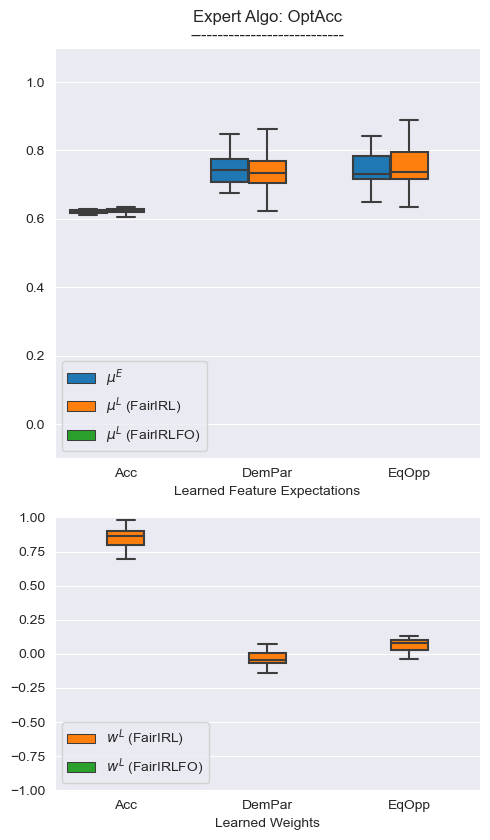

In [38]:
n_expert_demos = 3
n_init_pols = 1

mu_df, w_df = plot_results_source_domain_only(
    objective_set_names=['Acc', 'DemPar', 'EqOpp'],
    expert_algo='OptAcc',
    dataset='COMPAS',
    mu_noise_factor=.01,
    w_noise_factor=.01,
    mu_hue_order=['muE', 'muL (FairIRL)', 'muL (FairIRLFO)'],
    w_hue_order=[None, 'wL (FairIRL)', 'wL (FairIRLFO)'],
    extra_skip_conditions=(lambda info: (info['N_EXPERT_DEMOS'] != n_expert_demos) or (info['N_INIT_POLICIES'] != n_init_pols)),
    min_exp_timestamp='2023-06-06 12:30:00',
)

DATASET: COMPAS


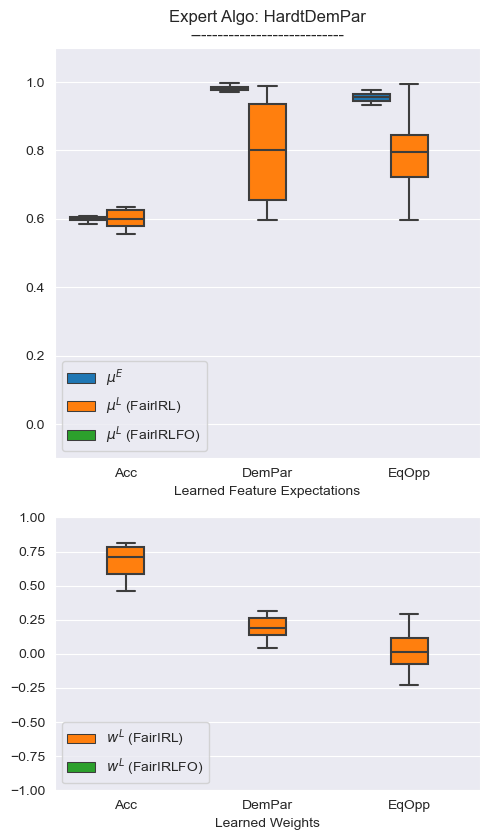

In [39]:
n_expert_demos = 3
n_init_pols = 1

mu_df, w_df = plot_results_source_domain_only(
    objective_set_names=['Acc', 'DemPar', 'EqOpp'],
    expert_algo='HardtDemPar',
    dataset='COMPAS',
    mu_noise_factor=.01,
    w_noise_factor=.01,
    mu_hue_order=['muE', 'muL (FairIRL)', 'muL (FairIRLFO)'],
    w_hue_order=[None, 'wL (FairIRL)', 'wL (FairIRLFO)'],
    extra_skip_conditions=(lambda info: (info['N_EXPERT_DEMOS'] != n_expert_demos) or (info['N_INIT_POLICIES'] != n_init_pols)),
    min_exp_timestamp='2023-06-06 12:30:00',
)

DATASET: COMPAS


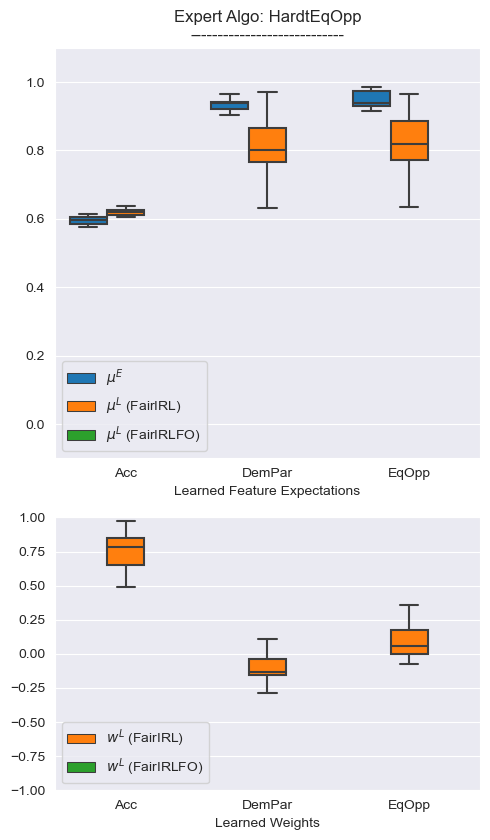

In [40]:
n_expert_demos = 3
n_init_pols = 1

mu_df, w_df = plot_results_source_domain_only(
    objective_set_names=['Acc', 'DemPar', 'EqOpp'],
    expert_algo='HardtEqOpp',
    dataset='COMPAS',
    mu_noise_factor=.01,
    w_noise_factor=.01,
    mu_hue_order=['muE', 'muL (FairIRL)', 'muL (FairIRLFO)'],
    w_hue_order=[None, 'wL (FairIRL)', 'wL (FairIRLFO)'],
    extra_skip_conditions=(lambda info: (info['N_EXPERT_DEMOS'] != n_expert_demos) or (info['N_INIT_POLICIES'] != n_init_pols)),
    min_exp_timestamp='2023-06-06 12:30:00',
)

# Compare results with target domain

SOURCE DATASET: COMPAS
TARGET DATASET: Adult


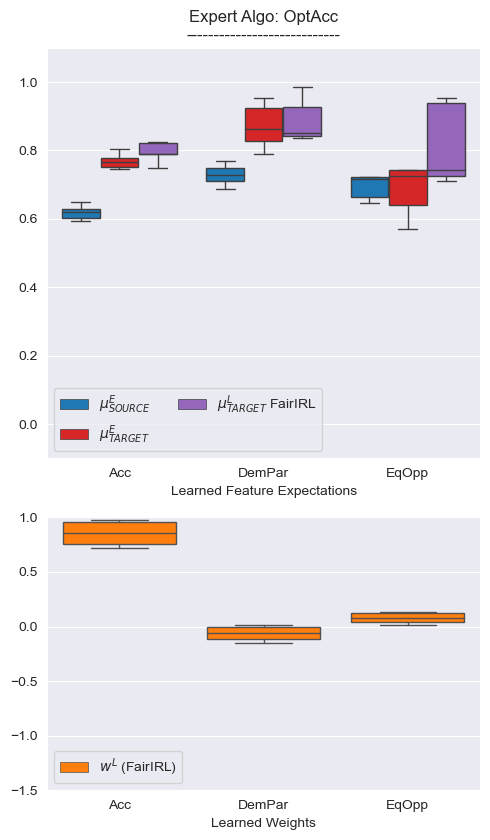

In [41]:
mu_df, w_df = plot_results_target_domain(
    objective_set_names=['Acc', 'DemPar', 'EqOpp'],
    expert_algo='OptAcc',
    source_dataset='COMPAS',
    target_dataset='Adult',
    mu_noise_factor=.1,
    w_noise_factor=.01,
    min_exp_timestamp='2023-06-06 12:30:00',
)

SOURCE DATASET: COMPAS
TARGET DATASET: Adult


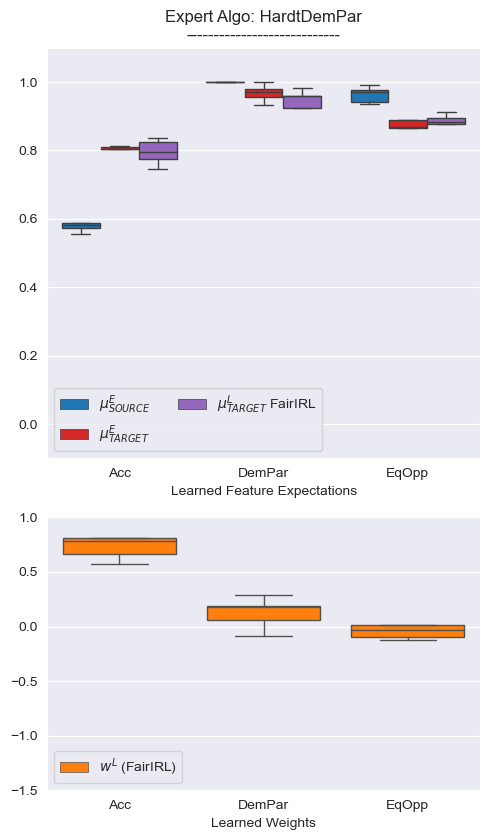

In [42]:
mu_df, w_df = plot_results_target_domain(
    objective_set_names=['Acc', 'DemPar', 'EqOpp'],
    expert_algo='HardtDemPar',
    source_dataset='COMPAS',
    target_dataset='Adult',
    mu_noise_factor=.1,
    w_noise_factor=.01,
    min_exp_timestamp='2023-06-06 12:30:00',
)

SOURCE DATASET: COMPAS
TARGET DATASET: Adult


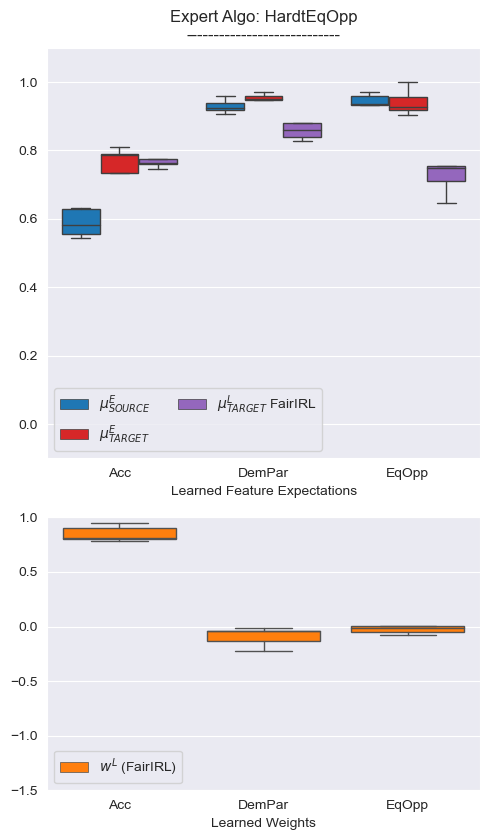

In [43]:
mu_df, w_df = plot_results_target_domain(
    objective_set_names=['Acc', 'DemPar', 'EqOpp'],
    expert_algo='HardtEqOpp',
    source_dataset='COMPAS',
    target_dataset='Adult',
    mu_noise_factor=.1,
    w_noise_factor=.01,
    min_exp_timestamp='2023-06-06 12:30:00',
)

# Scratch